In [23]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [24]:
from langchain_groq import ChatGroq
# llm = ChatOpenAI(model="gpt-4o-mini" , api_key=os.getenv("OPENAI_API_KEY"))
llm = ChatGroq(model=os.getenv("GROQ_MODEL_NAME") , api_key=os.getenv("GROQ_API_KEY"))

In [25]:
llm.invoke("hello")

AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.017408034, 'prompt_time': 0.010586064, 'queue_time': 0.045431396, 'total_time': 0.027994098}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'finish_reason': 'stop', 'logprobs': None}, id='run--92d90b03-d897-41c1-9420-ee20295c6772-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [26]:
from typing import TypedDict, Optional, List
from typing_extensions import NotRequired


class Project(TypedDict):
    project_name: Optional[str]
    github_link: NotRequired[Optional[str]]
    live_link: NotRequired[Optional[str]]
    time_period: NotRequired[Optional[str]]
    features: NotRequired[List[str]]
    tech_stack: NotRequired[List[str]]


class SkillsSection(TypedDict):
    programming_languages: NotRequired[List[str]]
    frameworks: NotRequired[List[str]]
    libraries_tools: NotRequired[List[str]]
    databases: NotRequired[List[str]]
    soft_skills: NotRequired[List[str]]


class Experience(TypedDict):
    role: Optional[str]
    company: Optional[str]
    start_date: NotRequired[Optional[str]]
    end_date: NotRequired[Optional[str]]
    responsibilities: NotRequired[List[str]]


class ExtracurricularActivity(TypedDict):
    title: Optional[str]
    organization: NotRequired[Optional[str]]
    description: NotRequired[Optional[str]]
    date: NotRequired[Optional[str]]


class ResumeAgentState(TypedDict):
    message: NotRequired[Optional[str]]
    full_text: NotRequired[Optional[str]]
    links: NotRequired[List[dict]]

    # Personal Info
    name: NotRequired[Optional[str]]
    email: NotRequired[Optional[str]]
    mob_no: NotRequired[Optional[str]]

    # Profile Links
    linkedin: NotRequired[Optional[str]]
    github: NotRequired[Optional[str]]
    leetcode: NotRequired[Optional[str]]

    # Skills and Projects
    skills: NotRequired[SkillsSection]
    projects: NotRequired[List[Project]]

    # Experience and Extracurriculars
    experience: NotRequired[List[Experience]]
    extracurriculars: NotRequired[List[ExtracurricularActivity]]


# job_state.py
class JobInfoState(TypedDict):
    response: Optional[str]
    user_input: Optional[str]
    job_title: Optional[str]
    company: Optional[str]
    location: NotRequired[Optional[str]]
    job_type: NotRequired[Optional[str]]  # Full-time, Internship, etc.
    description: NotRequired[Optional[str]]
    required_skills: NotRequired[List[str]]


In [27]:
from pydantic import BaseModel, EmailStr, Field
from typing import Optional, List

class Project(BaseModel):
    project_name: str = Field(..., description="Name of the project")
    github_link: Optional[str] = Field(None, description="GitHub URL of the project")
    live_link: Optional[str] = Field(None, description="Live demo or deployment link")
    time_period: Optional[str] = Field(None, description="Time duration or dates of the project")
    features: Optional[List[str]] = Field(default_factory=list, description="Key features of the project")
    tech_stack: Optional[List[str]] = Field(default_factory=list, description="Technologies used in the project")


class SkillsSection(BaseModel):
    programming_languages: Optional[List[str]] = Field(default_factory=list, description="Languages like Python, C++")
    frameworks: Optional[List[str]] = Field(default_factory=list, description="Frameworks like Django, React")
    libraries_tools: Optional[List[str]] = Field(default_factory=list, description="Libraries and tools like NumPy, Git")
    databases: Optional[List[str]] = Field(default_factory=list, description="Databases like MongoDB, MySQL")
    soft_skills: Optional[List[str]] = Field(default_factory=list, description="Soft skills like leadership, communication")


class Experience(BaseModel):
    role: str = Field(..., description="Job title or position held")
    company: str = Field(..., description="Company or organization name")
    start_date: Optional[str] = Field(None, description="Start date in format YYYY-MM or similar")
    end_date: Optional[str] = Field(None, description="End date or 'Present'")
    responsibilities: Optional[List[str]] = Field(default_factory=list, description="Key responsibilities or achievements")


class ExtracurricularActivity(BaseModel):
    title: str = Field(..., description="Name of the activity or achievement")
    organization: Optional[str] = Field(None, description="Organization or club involved")
    description: Optional[str] = Field(None, description="Details of the activity")
    date: Optional[str] = Field(None, description="Date or time period of the activity")


class ExtractResumeData(BaseModel):
    # Personal Information
    name: Optional[str] = Field(None, description="Candidate's full name")
    email: Optional[EmailStr] = Field(None, description="Email address")
    mob_no: Optional[str] = Field(None, description="Mobile phone number")

    # Profiles
    linkedin: Optional[str] = Field(None, description="LinkedIn profile URL")
    github: Optional[str] = Field(None, description="GitHub profile URL")
    leetcode: Optional[str] = Field(None, description="LeetCode profile URL")

    # Skills and Projects
    skills: Optional[SkillsSection] = Field(default_factory=SkillsSection, description="Structured skill information")
    projects: Optional[List[Project]] = Field(default_factory=list, description="List of personal or academic projects")

    # New Sections
    experience: Optional[List[Experience]] = Field(default_factory=list, description="Work or internship experience")
    extracurriculars: Optional[List[ExtracurricularActivity]] = Field(default_factory=list, description="Clubs, competitions, and other activities")


class ExtractJobInfo(BaseModel):
    job_title: str = Field(..., description="Title of the job role, e.g., Software Engineer, Data Analyst")
    company: Optional[str] = Field(None, description="Name of the company offering the job")
    location: Optional[str] = Field(None, description="Job location, e.g., city, state, or remote")
    job_type: Optional[str] = Field(None, description="Type of job, e.g., Full-time, Internship, Contract")
    description: Optional[str] = Field(None, description="Full job description text")
    required_skills: List[str] = Field(default_factory=list, description="List of skills required for the job role")

In [28]:

from langchain_groq import ChatGroq
from langchain_google_genai import ChatGoogleGenerativeAI

import os
from dotenv import load_dotenv
load_dotenv()
print(os.getenv("GROQ_MODEL_NAME"))

# llm = ChatGroq(model="llama-3.3-70b-versatile")
llm = ChatGoogleGenerativeAI(model="gemini-2.5-pro" , api_key=os.getenv("GOOGLE_API_KEY"))

def load_llm():
    return llm

llama-3.3-70b-versatile


In [31]:


def extract_resume_data(state: ResumeAgentState) -> ResumeAgentState:
    try:
        # Load the structured-output LLM with the expected schema
        llm = load_llm().with_structured_output(ExtractResumeData)
        
        # Extract inputs from state
        full_text = state.get('full_text' , '')
        links = state.get('links' , [])

        # Combine text and links into a single input string
        resume_input = full_text + "\n\nLinks:\n" + "\n".join(
        f"Page: {link['page']}, Text: {link['text']}, URL: {link['url']}" for link in links)

        # Invoke the LLM to extract structured data
        extracted_data = llm.invoke(resume_input)

        # Return the updated state
        return extracted_data.model_dump()

    except Exception as e:
        raise RuntimeError(f"Failed to extract resume data: {e}")

In [32]:
import requests


def check_links_and_alert(state: ResumeAgentState) -> ResumeAgentState:
    broken_links = []
    
    for key, value in state.items():
        if key in ("full_text", "links"):
            continue
        if isinstance(value, list):
            for item in value:
                if isinstance(item, dict):
                    for k, v in item.items():
                        if isinstance(v, str) and v.startswith("http"):
                            try:
                                response = requests.get(v, timeout=5)
                                if response.status_code >= 400:
                                    broken_links.append((k, v, response.status_code))
                            except Exception:
                                broken_links.append((k, v, "Error"))
        elif isinstance(value, str) and value.startswith("http"):
            try:
                response = requests.get(value, timeout=5)
                if response.status_code >= 400:
                    broken_links.append((key, value, response.status_code))
            except Exception:
                broken_links.append((key, value, "Error"))

    if broken_links:
        msg = "🚨 Some links in your resume are not working:\n"
        for k, link, status in broken_links:
            msg += f"- **Key**: `{k}` | **Link**: {link} | **Status**: {status}\n"
        msg += "\n🔁 Please update these links in your resume."
    else:
        msg = "✅ All good! All details are fetched successfully and your links are working fine."

    return {"message":msg}

In [33]:
def response(state: ResumeAgentState) -> ResumeAgentState:
    return

In [36]:

from langgraph.graph import StateGraph , START , END

def build_graph():

    builder = StateGraph(ResumeAgentState)

    builder.add_node("extract_resume_data" , extract_resume_data)
    builder.add_node("check_links_and_alert" , check_links_and_alert)

    builder.add_edge(START , "extract_resume_data")
    builder.add_edge("extract_resume_data" , "check_links_and_alert")
    builder.add_edge("check_links_and_alert" , END)

    graph = builder.compile()
    return graph

In [37]:
graph = build_graph()

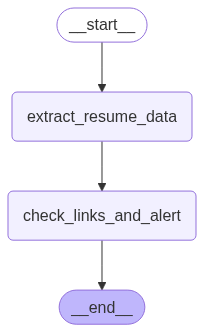

In [38]:
from IPython.display import Image , display
display(Image(graph.get_graph().draw_mermaid_png()))

In [39]:
import fitz  # PyMuPDF

def extract_text_and_links(pdf_path: str):
    full_text = ""
    links = []

    pdf = fitz.open(pdf_path)
    
    for page_num, page in enumerate(pdf, start=1):
        full_text += page.get_text()

        # Extract links on this page
        for link in page.get_links():
            uri = link.get("uri", None)
            rect = link.get("from", None)
            if uri and rect:
                # Get anchor text behind the link
                anchor_text = page.get_textbox(rect)
                links.append({
                    "page": page_num,
                    "text": anchor_text.strip(),
                    "url": uri.strip()
                })

    pdf.close()

    return full_text, links

In [40]:
text , links = extract_text_and_links("Shubham_resume_with_photo.pdf")

In [42]:
print(text[:500])

 
Shubham Dahane 
shubhamdahane09yz@gmail.com | (+91) 7666174552 
 
ShubhamDahane18                                                                                                  
Shubham Dahane 
 
SKILLS 
❖ Programming Languages: Python | C++ 
❖ Technologies And Frameworks: AI | ML | DL | Gen AI | TensorFlow | PyTorch | 
LangChain | LangGraph | HTML | CSS| Javascript | VectorDB | MongoDB 
❖ Tools: Git, GitHub, Docker 
EDUCATION 
❖ BRACT’s Vishwakarma Institute of Information Technology, Pune 


In [43]:
links[:3]

[{'page': 1,
  'text': 'ShubhamDahane18',
  'url': 'https://github.com/ShubhamDahane18'},
 {'page': 1,
  'text': 'ShubhamDahane18',
  'url': 'https://github.com/ShubhamDahane18'},
 {'page': 1,
  'text': 'ShubhamDahane18',
  'url': 'https://github.com/ShubhamDahane18'}]

In [44]:
resume_input = text + "\n\nLinks:\n" + "\n".join(
    f"Page: {link['page']}, Text: {link['text']}, URL: {link['url']}" for link in links
)

In [45]:
resume_input

" \nShubham Dahane \nshubhamdahane09yz@gmail.com | (+91) 7666174552 \n \nShubhamDahane18                                                                                                  \nShubham Dahane \n \nSKILLS \n❖ Programming Languages: Python | C++ \n❖ Technologies And Frameworks: AI | ML | DL | Gen AI | TensorFlow | PyTorch | \nLangChain | LangGraph | HTML | CSS| Javascript | VectorDB | MongoDB \n❖ Tools: Git, GitHub, Docker \nEDUCATION \n❖ BRACT’s Vishwakarma Institute of Information Technology, Pune \nB. Tech Computer Science & Engineering (AI), 2023 – 2027 (CGPA – 8.44)  \n❖ Yashwantrao Chavan Secondary And Higher Secondary School Kajalamba, Washim  \nHSC 97.83%, 2020 – 2021 (Rank 1)  \n❖ Yashwantrao Chavan Secondary And Higher Secondary School Kajalamba, Washim  \nSchool education up to March 2019, SSC 91.00% (Rank 1) \n \nACADEMIC PROJECTS \n❖ End to End Agentic AI Chatbot with Tools  \n \n \n    \nBuilt an Agentic AI Chatbot using LangGraph with Groq models (LLaMA3 & Gemma

In [46]:
input_state = {
                "full_text": text,
                "links": links
            }

In [47]:
state = graph.invoke(input_state)

In [48]:
state

{'message': '🚨 Some links in your resume are not working:\n- **Key**: `linkedin` | **Link**: https://www.linkedin.com/in/shubhamdahane18 | **Status**: 999\n\n🔁 Please update these links in your resume.',
 'full_text': " \nShubham Dahane \nshubhamdahane09yz@gmail.com | (+91) 7666174552 \n \nShubhamDahane18                                                                                                  \nShubham Dahane \n \nSKILLS \n❖ Programming Languages: Python | C++ \n❖ Technologies And Frameworks: AI | ML | DL | Gen AI | TensorFlow | PyTorch | \nLangChain | LangGraph | HTML | CSS| Javascript | VectorDB | MongoDB \n❖ Tools: Git, GitHub, Docker \nEDUCATION \n❖ BRACT’s Vishwakarma Institute of Information Technology, Pune \nB. Tech Computer Science & Engineering (AI), 2023 – 2027 (CGPA – 8.44)  \n❖ Yashwantrao Chavan Secondary And Higher Secondary School Kajalamba, Washim  \nHSC 97.83%, 2020 – 2021 (Rank 1)  \n❖ Yashwantrao Chavan Secondary And Higher Secondary School Kajalamba, Washim

# Job Info

In [49]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [50]:
from langchain_groq import ChatGroq
# llm = ChatOpenAI(model="gpt-4o-mini" , api_key=os.getenv("OPENAI_API_KEY"))
llm = ChatGroq(model=os.getenv("GROQ_MODEL_NAME") , api_key=os.getenv("GROQ_API_KEY"))

In [51]:
from typing import TypedDict, Optional, List
from typing_extensions import NotRequired

In [52]:
class JobInfoState(TypedDict):
    response: Optional[str]
    user_input: Optional[str]
    job_title: Optional[str]
    company: Optional[str]
    location: NotRequired[Optional[str]]
    job_type: NotRequired[Optional[str]]  # Full-time, Internship, etc.
    description: NotRequired[Optional[str]]
    required_skills: NotRequired[List[str]]
    limit: int = 0
    end: bool = False
    analysis: Optional[dict]

In [53]:
from pydantic import BaseModel, Field
from typing import Optional, List

In [54]:
class ExtractJobInfo(BaseModel):
    job_title: Optional[str] = Field(None, description="Title of the job role, e.g., Software Engineer, Data Analyst")
    company: Optional[str] = Field(None, description="Name of the company offering the job")
    location: Optional[str] = Field(None, description="Job location, e.g., city, state, or remote")
    job_type: Optional[str] = Field(None, description="Type of job, e.g., Full-time, Internship, Contract")
    description: Optional[str] = Field(None, description="Full job description text")
    required_skills: Optional[List[str]] = Field(default_factory=list, description="List of skills required for the job role given by user.")

In [55]:
class CheckJobResponse(BaseModel):
    response: str = Field(..., description="Short, clear response asking for missing fields or confirming completion")
    end: bool = Field(default=False, description="Whether all required fields are present. True if everything is complete, otherwise False")

In [56]:
from pydantic import BaseModel, Field
from typing import List

class ResumeMatchResponse(BaseModel):
    good: List[str] = Field(default_factory=list, description="Points where the resume matches the job requirements")
    missing: List[str] = Field(default_factory=list, description="Important missing skills/experiences compared to job requirements")
    summary: str = Field(..., description="Short overall summary of how well the resume matches the job")

In [57]:
from langchain_core.prompts import PromptTemplate

check_state_prompt = PromptTemplate(
    template="""
You are validating extracted job information based on structured fields and the latest user input.

User Input: {user_input}

Job Title: {job_title}
Company: {company}
Location: {location}
Job Type: {job_type}
Description: {description}
Required Skills: {required_skills}

Instructions:
1. If the user explicitly states that they only have this much info, or cannot provide more,
   then respond: "Got all details you can move forward 🎉" and set end = True.

2. Otherwise, check the required fields: job_title, company, location, job_type, description, required_skills.
   - If any of them are missing or empty, respond with a short, clear message
     asking ONLY for those missing fields. Set end = False.
   - If all are present, respond: "Got all details, you can move forward 🎉". Set end = True.
""",
    input_variables=["user_input", "job_title", "company", "location", "job_type", "description", "required_skills"]
)

In [58]:
from langchain_core.prompts import PromptTemplate

resume_match_prompt = PromptTemplate(
    template="""
You are comparing a candidate's resume against a job description.

--- Job Info ---
Title: {job_title}
Company: {company}
Location: {location}
Job Type: {job_type}
Description: {description}
Required Skills: {required_skills}

--- Resume Info ---
Skills: {skills}
Projects: {projects}
Experience: {experience}
Extracurriculars: {extracurriculars}


Task:
1. Identify skills or experiences from the resume that match the job requirements → good.
2. Identify key skills/requirements missing from the resume → missing.
3. Provide a short summary of overall fit → summary.

Return a structured response.
""",
    input_variables=["job_title", "company", "location", "job_type", "description", "required_skills", 
                    "skills", "projects" , "experience" , "extracurriculars"]
)

In [59]:
from langgraph.graph import StateGraph , START , END

In [60]:
resume = state
print(resume)

{'message': '🚨 Some links in your resume are not working:\n- **Key**: `linkedin` | **Link**: https://www.linkedin.com/in/shubhamdahane18 | **Status**: 999\n\n🔁 Please update these links in your resume.', 'full_text': " \nShubham Dahane \nshubhamdahane09yz@gmail.com | (+91) 7666174552 \n \nShubhamDahane18                                                                                                  \nShubham Dahane \n \nSKILLS \n❖ Programming Languages: Python | C++ \n❖ Technologies And Frameworks: AI | ML | DL | Gen AI | TensorFlow | PyTorch | \nLangChain | LangGraph | HTML | CSS| Javascript | VectorDB | MongoDB \n❖ Tools: Git, GitHub, Docker \nEDUCATION \n❖ BRACT’s Vishwakarma Institute of Information Technology, Pune \nB. Tech Computer Science & Engineering (AI), 2023 – 2027 (CGPA – 8.44)  \n❖ Yashwantrao Chavan Secondary And Higher Secondary School Kajalamba, Washim  \nHSC 97.83%, 2020 – 2021 (Rank 1)  \n❖ Yashwantrao Chavan Secondary And Higher Secondary School Kajalamba, Washim 

In [61]:
def get_resume_details():
    return resume

In [78]:
def parse_info(state:JobInfoState) -> JobInfoState:
    text = state["user_input"]
    limit = state.get("limit" , 0) + 1
    print(f"Limit: {limit}\n")
    llm_strc = llm.with_structured_output(ExtractJobInfo)
    result = llm_strc.invoke(text)
    updates = {k: v for k, v in result.model_dump().items() if v not in [None, [], ""]}
    updates['limit'] = limit
    print(f"JOB INFO : {result.model_dump()}\n")
    return updates

def response(state:JobInfoState) -> JobInfoState:
    structured_llm = llm.with_structured_output(CheckJobResponse)
    chain = check_state_prompt | structured_llm
    result = chain.invoke({
        "user_input": state.get("user_input" , '') ,
        "job_title": state.get("job_title" , '') , 
        "company": state.get("company" , '') , 
        "location": state.get("location" , '') , 
        "job_type": state.get("job_type" , '') ,
        "description": state.get("job_type" , '') , 
        "required_skills": state.get("required_skills" , '')
    })
    return result.model_dump()

def resume_match_node(state:JobInfoState) -> JobInfoState:
    structured_llm = llm.with_structured_output(ResumeMatchResponse)

    # flatten job and resume info into one dict for prompt
    chain = resume_match_prompt | structured_llm
    resume = get_resume_details()
    
    result = chain.invoke({
        "job_title": state.get("job_title" , '') , 
        "company": state.get("company" , '') , 
        "location": state.get("location" , '') , 
        "job_type": state.get("job_type" , '') ,
        "description": state.get("job_type" , '') , 
        "required_skills": state.get("required_skills" , '') , 
        "skills": resume.get("skills" , '') , 
        "projects": resume.get("projects" , '') , 
        "experience": resume.get("experience" , '') , 
        "extracurriculars": resume.get("extracurriculars" , '')
    })

    return {"analysis": result.model_dump()}

def check_if_complete(state:JobInfoState):
    return "resume_match" if state.get("end", False) or state.get("limit" , 0) >= 6 else "end"

# --- Graph setup ---
graph = StateGraph(JobInfoState)

graph.add_node("parse_info", parse_info)
graph.add_node("response", response)
graph.add_node("resume_match", resume_match_node)

graph.add_edge(START, "parse_info")
graph.add_edge("parse_info", "response")
graph.add_conditional_edges(
    "response",
    check_if_complete,
    {"end": END, "resume_match": "resume_match"}
)
graph.add_edge("resume_match", END)

app = graph.compile()


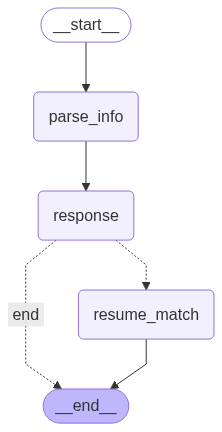

In [79]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [80]:
state = {}
config = {"configurable":{"thread_id":"1"}}

In [81]:
while True:
    user_text = input("You: ")
    state["user_input"] = user_text
    state = app.invoke(state , config=config)
    if state.get("end", False) or state.get("limit" , 0) >= 6:
       print(f"Analysis: {state['analysis']}\n")
       break
    print(f"State:{state}")

Limit: 1

JOB INFO : {'job_title': 'Data Scientist', 'company': 'TechNova Solutions', 'location': None, 'job_type': None, 'description': None, 'required_skills': []}

State:{'response': 'Please provide location, job type, description, and required skills', 'user_input': 'I am applying for Data Scientist at TechNova Solutions', 'job_title': 'Data Scientist', 'company': 'TechNova Solutions', 'limit': 1, 'end': False}
Limit: 2

JOB INFO : {'job_title': None, 'company': None, 'location': 'Pune', 'job_type': None, 'description': None, 'required_skills': []}

State:{'response': 'Please provide job type, description and required skills', 'user_input': 't’s based in Pune', 'job_title': 'Data Scientist', 'company': 'TechNova Solutions', 'location': 'Pune', 'limit': 2, 'end': False}
Limit: 3

JOB INFO : {'job_title': None, 'company': None, 'location': None, 'job_type': None, 'description': None, 'required_skills': ['Python', 'SQL']}

State:{'response': 'Missing fields: job_type, description. Ple